<h2><center> Titanic - Machine Learning from Disaster </center></h2>
<p> Nesse notebook utilizaremos uma competição clássica da plataforma kaggle para testar modelos de aprendizado de máquina para qual devemos prever se um determinado indivíduo, dentro de uma base de dados de testes, sobreviveu ao desastre do Titanic ou não.
<p> Conseguimos acessar a competição em: <a href="https://www.kaggle.com/c/titanic">https://www.kaggle.com/c/titanic</a>

<p> Obs.: A depender da execução aplicada, serão feitas correções e aperfeiçoamentos ao longo do desenvolvimento para melhorar a <b>acurácia</b>. Com isso, cada etapa servirá como aprendizado e observação dos modelos utilizados.

<br><h4>1. Processando dados</h4>
    
<p> O <b>primeiro passo</b> para entender sobre esse desafio está no carregamento dos nossos dados de treino e teste, disponibilizados na plataforma. Para isso, utilizaremos a biblioteca pandas para ler o nosso arquivo de extensão csv e visualizar o nosso dataframe.

<ul>
<li>Treino: os dados de treino serão utilizados para construir o nosso modelo de aprendizado, na qual possuímos uma resposta sobre alguns sobreviventes do desastre.</li>
<li>Teste: os dados de teste serão utilizados, como propriamente dito, para testagem do nosso modelo e prever se outros indivíduos não presentes nos dados de treino sobreviveram ou não ao desastre.</li>
</ul>

<p> Vamos então importar a nossa biblioteca pandas, ler os arquivos <b>"train.csv"</b> e <b>"test.csv"</b> e por último converter os nossos dados em dataframes.
    
<p> Visualizaremos os dados de treino para entender todas as nossas variáveis presentes.

In [1]:
import pandas as pd

In [2]:
df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')

df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<p> Conseguimos dar o nosso primeiro passo e percebemos que estamos trabalhando com diversos tipos de colunas que podem ou não fazer sentido para o nosso modelo, além de observar mais de <b>800 linhas de dados</b> para cada uma delas. Antes de continuarmos, vamos entender o que as colunas representam nesse dataframe.
    
<ul>
    <li>PassengerId: identificador do passageiro</li>
    <li>Survided: sobreviveu (0 = Não, 1 = Sim)</li>
    <li>Pclass: classe do passageiro (1 = 1º, 2 = 2º, 3 = 3º)</li>
    <li>Name: nome</li>
    <li>Sex: gênero</li>
    <li>Age: idade</li>
    <li>SibSp: número de irmãos/cônjuges a bordo</li>
    <li>Ticket: número do bilhete</li>
    <li>Fare: tarifa do passageiro</li>
    <li>Cabin: número da cabine</li>
    <li>Embarked: local de embarcação do passageiro (C = Cherbourg, Q = Queenstown, S = Southampton)</li>

</ul>

<p> O <b>segundo passo</b> para essa etapa está na análise de dados dos nossos dataframes. Podemos perceber que "Name", "Ticket" etc em nada acrescentam no modelo de aprendizado que iremos utilizar. Com isso, vamos utilizar o comando "drop" para excluir esses dados que não serão úteis futuramente na execução.

<br>
<h4>2. Normalizando dados </h4>

<p> Após ter feito o processamento dos dados, podemos observar alguns pontos que precisam ser notados para que nosso modelo de aprendizado o faça da maneira correta.

<p> São eles: dados faltantes ou <b>NaN</b> (Not a Number) e cadeia de caracteres (strings) na coluna "Sex".
    
<p> Alguns algorítmos de aprendizado de máquina exigem que suas entradas sejam numéricas. Isso significa que precisamos substituir as strings "male" e "female" para 1 e 0 respectivamente.
    
<p> Sabemos também que não há dados faltantes nessas colunas, executando o comando value_counts.

In [3]:
df_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<br>Podemos observar <i>577</i> dados para homens e <i>314</i> para mulhres. 
   Temos uma soma de <i>891</i>, quantidade exata de passageiros nos dados de treino.
<p> Vamos agora substituir todos esses valores para 1 e 0.

In [4]:
df_train.replace({'male': 1, 'female': 0}, inplace = True)
df_test.replace({'male': 1, 'female': 0}, inplace = True)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


<br> Queremos agora saber se há dados faltantes nas nossas colunas "Pclass" e "Age".
<p> Para detectar os valores NaN, podemos utilizar o método <b>isnull( )</b> ou <b>isna( )</b>.

In [5]:
df_train.isna().value_counts()

PassengerId  Survived  Pclass  Name   Sex    Age    SibSp  Parch  Ticket  Fare   Cabin  Embarked
False        False     False   False  False  False  False  False  False   False  True   False       529
                                                                                 False  False       183
                                             True   False  False  False   False  True   False       158
                                                                                 False  False        19
                                             False  False  False  False   False  False  True          2
dtype: int64

In [6]:
df_test.isna().value_counts()

PassengerId  Pclass  Name   Sex    Age    SibSp  Parch  Ticket  Fare   Cabin  Embarked
False        False   False  False  False  False  False  False   False  True   False       244
                                                                       False  False        87
                                   True   False  False  False   False  True   False        82
                                                                       False  False         4
                                   False  False  False  False   True   True   False         1
dtype: int64

<p> Conseguimos observar 177 valores faltantes na coluna "Age" nos dados de treino e 86 valores faltantes dessa mesma coluna nos dados de teste.

<p> Quando falamos de dados ausentes, uma das maneiras que podemos fazer é atribuir valores a essas linhas. Podemos utilizar a média de idades dos passageiros. No entanto, talvez essa solução seja ruim para o nosso modelo de machine learning pois temos 177 valores faltantes, considerando um número expressivo pela quantidade de dados que possuímos no dataset.
    
<p> Uma forma pensada para solucionar isso seria relacionar a coluna de Nomes com Idade. Podemos perceber que há títulos atribuídos aos nomes, como "Mr", "Miss" e sabemos que esses títulos podem estar ligados a idade do passageiro.
    
<p> Vamos então criar uma lista com esses títulos e criar uma função que retorne a média da idade daquele título.

In [7]:
#atribuindo os dataframes a outras variáveis

df_train_titulo = df_train[['PassengerId', 'Name', 'Sex', 'Age']]
df_test_titulo = df_test[['PassengerId', 'Name','Sex', 'Age']]

df_train_survived = df_train[['PassengerId', 'Survived']]

#vamos agora juntar os dois dataframes para serem trabalhados em conjunto

titulos_nan = pd.concat([df_train_titulo, df_test_titulo])

titulos_nan

,PassengerId,Name,Sex,Age
0,1,"Braund, Mr. Owen Harris",1,22.0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0
2,3,"Heikkinen, Miss. Laina",0,26.0
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0
4,5,"Allen, Mr. William Henry",1,35.0
...,...,...,...,...
413,1305,"Spector, Mr. Woolf",1,NaN
414,1306,"Oliva y Ocana, Dona. Fermina",0,39.0
415,1307,"Saether, Mr. Simon Sivertsen",1,38.5
416,1308,"Ware, Mr. Frederick",1,NaN


<p> Sabemos que os dados ausentes não serão relevantes para obtermos a média de idade para cada título. Logo, vamos utilizar o comando drop para cada linha que tenha dados ausentes em "Age".

In [8]:
titulos = titulos_nan.dropna()

In [9]:
lista = []

def titulo():
    for name in titulos['Name']:
        name = name.split(', ')
        name = name[1]
        name = name.split(' ')
        lista.append(name[0])
    return lista
titulo()

#transformando em um dicionário, após isso em um DataFrame
titulos = pd.DataFrame({'PassengerId': list(titulos['PassengerId']), 
                        'Title': lista,
                        'Sex': list(titulos['Sex']),
                        'Age': list(titulos['Age'])})

titulos.head()

,PassengerId,Title,Sex,Age
0,1,Mr.,1,22.0
1,2,Mrs.,0,38.0
2,3,Miss.,0,26.0
3,4,Mrs.,0,35.0
4,5,Mr.,1,35.0


<br> Vamos agora contar a quantidade de títulos presentes no nosso dataset.

In [10]:
titulos['Title'].value_counts()

Mr.          581
Miss.        210
Mrs.         170
Master.       53
Rev.           8
Dr.            7
Col.           4
Major.         2
Mlle.          2
Sir.           1
Ms.            1
Mme.           1
Lady.          1
Capt.          1
Jonkheer.      1
Dona.          1
the            1
Don.           1
Name: Title, dtype: int64

<p> Agora nós vamos obter a média da Idade em valores inteiros para cada título atribuído ao passageiro, após isso, armazenar em um dicionário para utilizar na substituição dos valores faltantes.

In [11]:
dict_title = dict(titulos.groupby(['Title'])['Age'].mean().astype(int))
print(dict_title)

{'Capt.': 70, 'Col.': 54, 'Don.': 40, 'Dona.': 39, 'Dr.': 43, 'Jonkheer.': 38, 'Lady.': 48, 'Major.': 48, 'Master.': 5, 'Miss.': 21, 'Mlle.': 24, 'Mme.': 24, 'Mr.': 32, 'Mrs.': 36, 'Ms.': 28, 'Rev.': 41, 'Sir.': 49, 'the': 33}


<p> Agora podemos substituir nossos valores de idades faltantes obedecendo nossas médias estabelecidas para cada título. Iremos então voltar para o início da nossa análise e substituir esses valores nos dados originais.

In [12]:
titulos_nan.head(7) #visualizando os 7 primeiros da tabela.

,PassengerId,Name,Sex,Age
0,1,"Braund, Mr. Owen Harris",1,22.0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0
2,3,"Heikkinen, Miss. Laina",0,26.0
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0
4,5,"Allen, Mr. William Henry",1,35.0
5,6,"Moran, Mr. James",1,NaN
6,7,"McCarthy, Mr. Timothy J",1,54.0


In [13]:
lista2 = []

def titulo_nan_replace():
    for name in titulos_nan['Name']:
        name = name.split(', ')
        name = name[1]
        name = name.split(' ')
        lista2.append(name[0])
    return lista2
titulo_nan_replace()

#transformando em um dicionário, após isso em um DataFrame
df_total = pd.DataFrame({'PassengerId': list(titulos_nan['PassengerId']),
                         'Title': lista2,
                         'Sex': list(titulos_nan['Sex']),
                         'Age': list(titulos_nan['Age'])})

df_total.head()

,PassengerId,Title,Sex,Age
0,1,Mr.,1,22.0
1,2,Mrs.,0,38.0
2,3,Miss.,0,26.0
3,4,Mrs.,0,35.0
4,5,Mr.,1,35.0


In [14]:
#descobrindo os títulos com dados faltantes.
df_total.set_index('Title').isna().sum(level = 0)

,PassengerId,Sex,Age
Title,,,
Mr.,0,0,176
Mrs.,0,0,27
Miss.,0,0,50
Master.,0,0,8
Don.,0,0,0
Rev.,0,0,0
Dr.,0,0,1
Mme.,0,0,0
Ms.,0,0,1


In [15]:
#substituindo a média dos títulos em dados faltantes
for key, value in dict_title.items():
    df_total.loc[(df_total['Age'].isnull()) & (df_total['Title'] == key), 'Age'] = value
    
df_total.head()

,PassengerId,Title,Sex,Age
0,1,Mr.,1,22.0
1,2,Mrs.,0,38.0
2,3,Miss.,0,26.0
3,4,Mrs.,0,35.0
4,5,Mr.,1,35.0


In [16]:
#Recriando os dois dados de treino e teste para nosso modelo de aprendizado

df_train = df_total.loc[(df_total['PassengerId'] <= 891)]
df_train.head()

,PassengerId,Title,Sex,Age
0,1,Mr.,1,22.0
1,2,Mrs.,0,38.0
2,3,Miss.,0,26.0
3,4,Mrs.,0,35.0
4,5,Mr.,1,35.0


In [17]:
df_test = df_total.loc[(df_total['PassengerId'] > 891)]
df_test.head()

,PassengerId,Title,Sex,Age
891,892,Mr.,1,34.5
892,893,Mrs.,0,47.0
893,894,Mr.,1,62.0
894,895,Mr.,1,27.0
895,896,Mrs.,0,22.0


<br>
<h4>3. Modelo de Treinamento </h4>

<p> Após a limpeza e preparação dos nossos dados, vamos agora trabalhar com o modelo de treinamento utilizando a biblioteca <b>scikit-learn</b>. Para nosso modelo, iremos utilizar uma infinidades de árvores decisão através do RandomForest.

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

import numpy as np

In [19]:
X = df_train[['Sex', 'Age']]
y = df_train_survived['Survived']

In [20]:
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_test.head()

,Sex,Age
495,1,32.0
648,1,32.0
278,1,7.0
31,0,36.0
255,0,29.0


In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 2), (179, 2), (712,), (179,))

In [22]:
model_training = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
model_training.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [23]:
predict = model_training.predict(X_test)

<br> Conseguimos obter então a acurácia do nosso modelo, que foi de <b>80%</b>. Com isso, conseguimos chegar em um valor que está acima de 50%, mas abaixo de 90%. Podemos melhorar nosso modelo analisando o código e as decisões. No entanto, já temos o nosso roteiro pronto para possíveis modificações.

In [24]:
np.mean(y_test == predict)

0.7988826815642458

In [25]:
# ou podemos usar também:

model_training.score(X_test, y_test)

0.7988826815642458

<br><h4>4. Matriz de Confusão </h4>

<p> Uma matriz de confusão é muito útil nos algoritmos de classificação, pois ela permite visualizar e analisar o desempenho de um modelo de aprendizado de máquina. Na diagonal da tabela podemos observar as previsões corretas do nosso modelo, com 138 mortos e 71 sobreviventes.

In [26]:
from sklearn.metrics import confusion_matrix
from yellowbrick.classifier import confusion_matrix
import matplotlib as plt

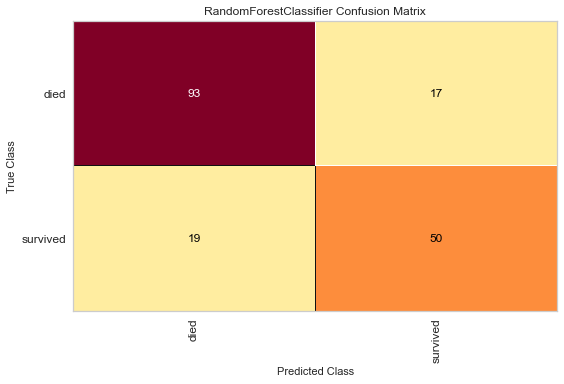

In [28]:
confusion_matrix(
    model_training,
    X_train, y_train, X_test, y_test,
    classes=['died', 'survived']
);